In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('WineQT.csv')

In [7]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [9]:
X = df.drop(columns=['quality'])
y = df['quality']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net = ElasticNetCV(cv=10, random_state=42)
ridge = RidgeCV(cv=10)
lasso = LassoCV(cv=10, random_state=42)

elastic_net.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

y_pred_en = elastic_net.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

mean = mean_squared_error(y_test, y_pred_en)
square = r2_score(y_test, y_pred_en)

ridge_mean = mean_squared_error(y_test, y_pred_ridge)
ridge_square = r2_score(y_test, y_pred_ridge)

lasso_mean = mean_squared_error(y_test, y_pred_lasso)
lasso_square = r2_score(y_test, y_pred_lasso)

In [12]:
print(f"Elastic Net: Mean Squared Error: {mean}, R-squared: {square}")
print(f"Ridge: Mean Squared Error: {ridge_mean}, R-squared: {ridge_square}")
print(f"Lasso: Mean Squared Error: {lasso_mean}, R-squared: {lasso_square}")

Elastic Net: Mean Squared Error: 0.37950359729368427, R-squared: 0.3180197332027247
Ridge: Mean Squared Error: 0.38101722331291826, R-squared: 0.31529969817857806
Lasso: Mean Squared Error: 0.3799225865946782, R-squared: 0.3172667958463604


In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
wine_g = df.drop(['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates',] , axis=1)
wine_g.head()

,fixed acidity,pH,alcohol,quality,Id
0,7.4,3.51,9.4,5,0
1,7.8,3.20,9.8,5,1
2,7.8,3.26,9.8,5,2
3,11.2,3.16,9.8,6,3
4,7.4,3.51,9.4,5,4


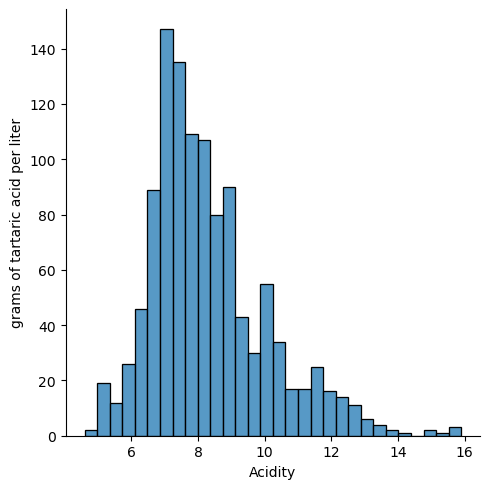

In [45]:
g = sns.displot(wine_g, x="fixed acidity")
g.set(xlabel="Acidity", ylabel="grams of tartaric acid per liter")

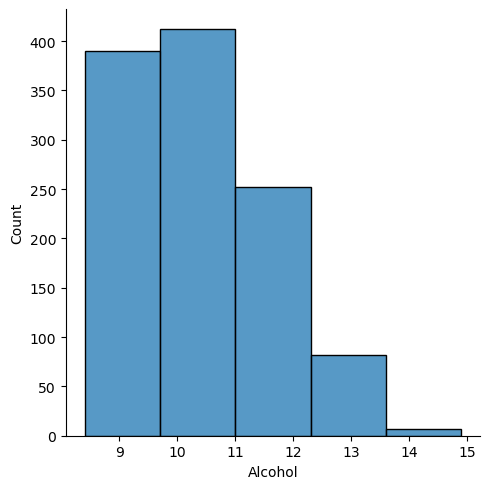

In [46]:
g = sns.displot(wine_g, x="alcohol",bins=5)
g.set(xlabel="Alcohol", ylabel="Count")

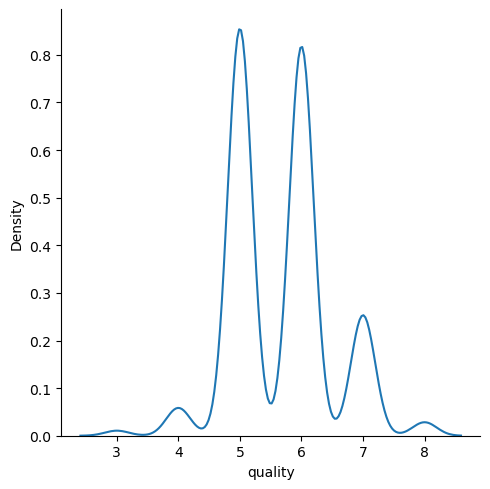

In [47]:
sns.displot(wine_g, x="quality", kind="kde")  

C:\Users\aadar\AppData\Local\Temp\ipykernel_28244\2876219331.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(wine_g, x="fixed acidity", hue='pH',kind="kde")


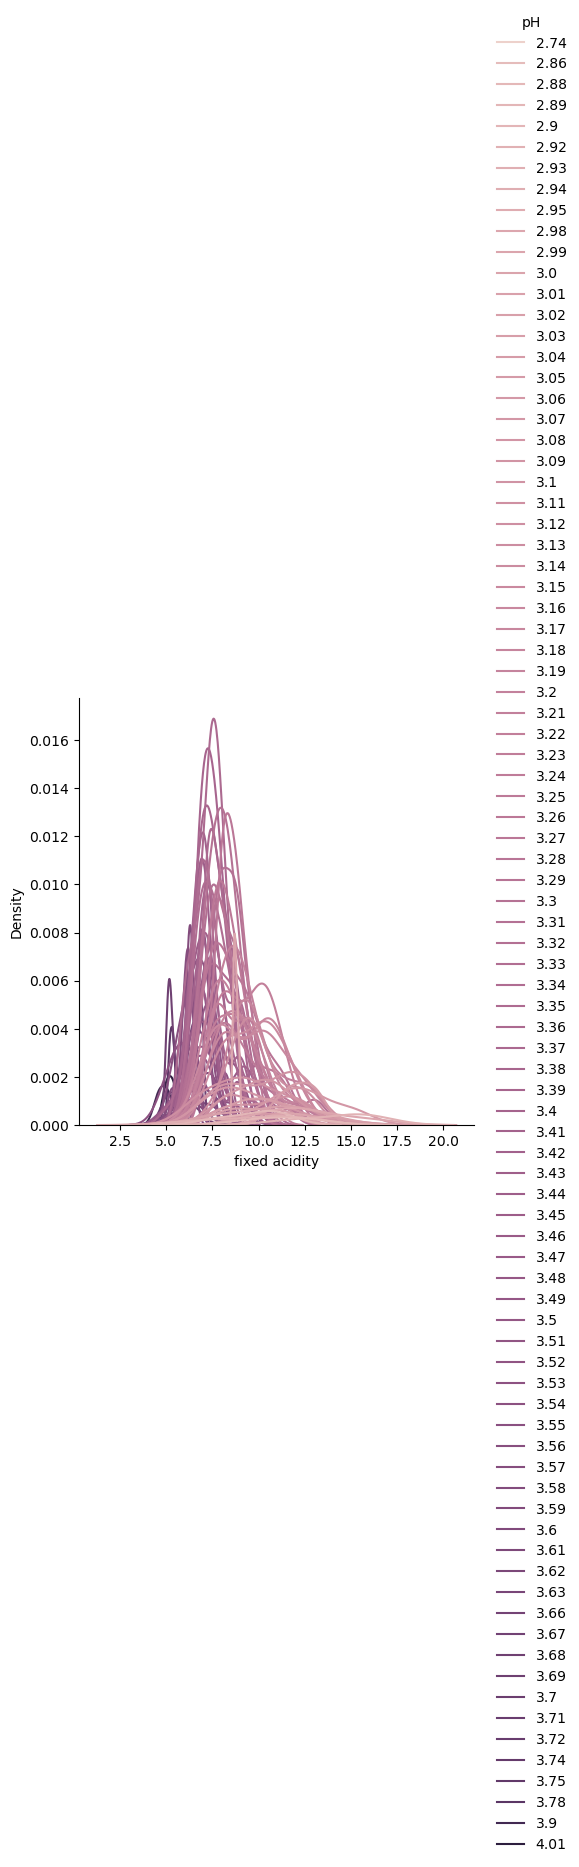

In [48]:
sns.displot(wine_g, x="fixed acidity", hue='pH',kind="kde") 

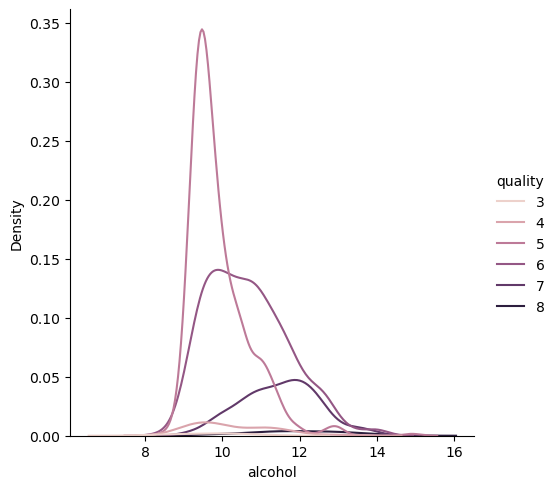

In [49]:
sns.displot(wine_g, x="alcohol", hue='quality',kind="kde") 

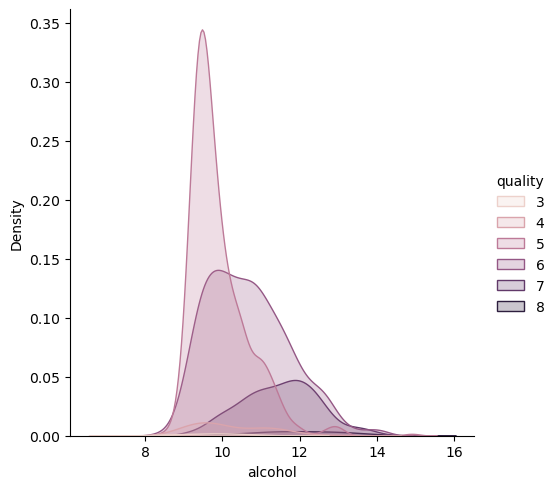

In [50]:
sns.displot(wine_g, x="alcohol", hue='quality',kind="kde",fill=True) 

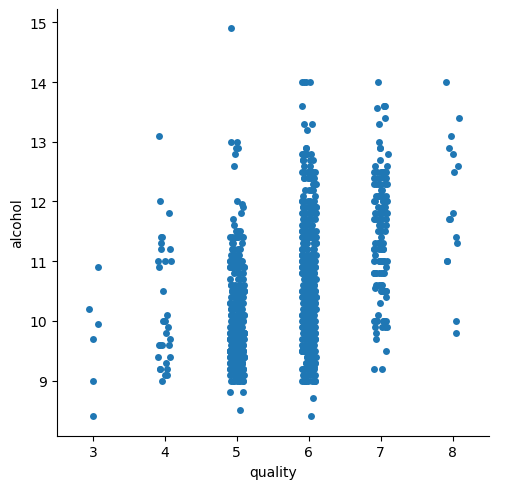

In [52]:
sns.catplot(x="quality",y="alcohol",data=wine_g)

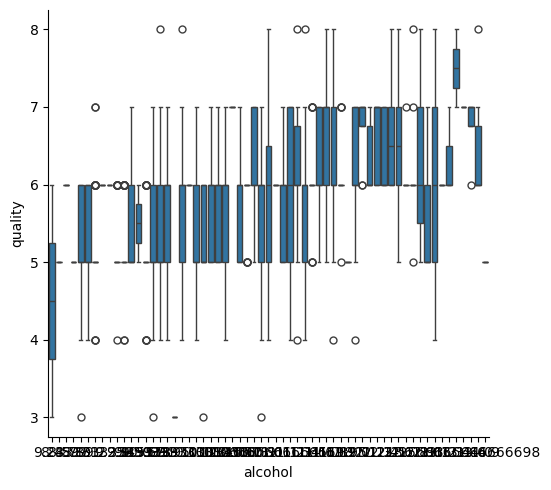

In [53]:
sns.catplot(x="alcohol", y="quality", kind="box", data=wine_g)

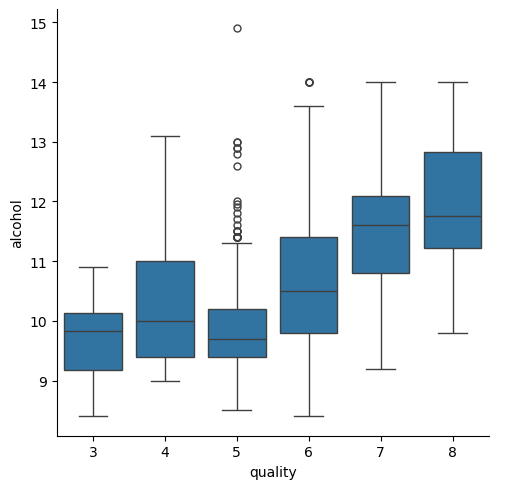

In [54]:
sns.catplot(x="quality", y="alcohol", kind="box", data=wine_g)

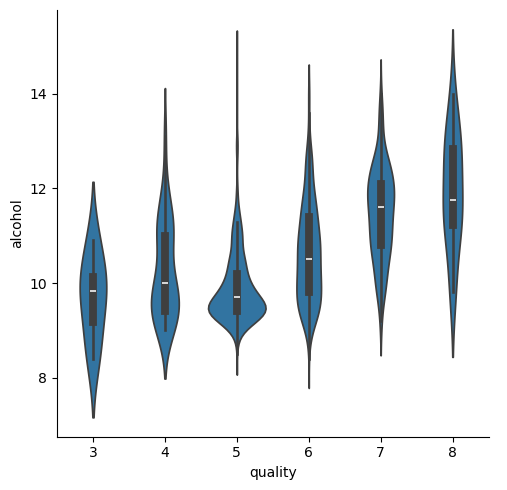

In [55]:
sns.catplot(x="quality", y="alcohol", kind="violin", data=wine_g)

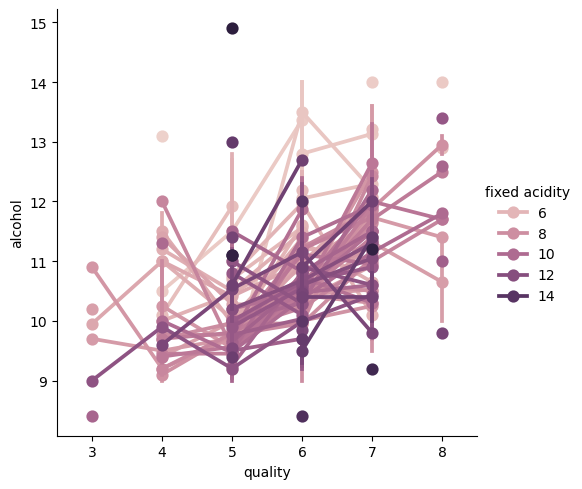

In [57]:
sns.catplot(x="quality", y="alcohol", hue="fixed acidity",kind="point", data=wine_g)

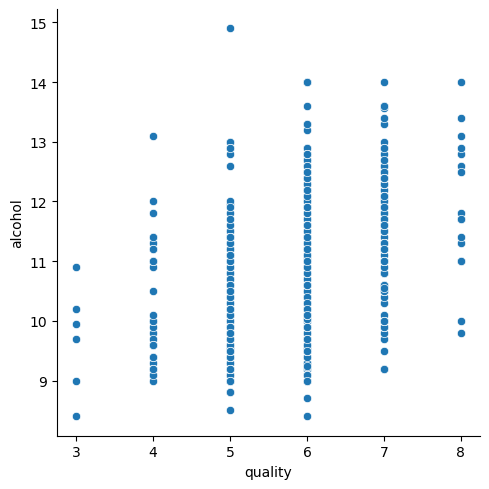

In [58]:
sns.relplot(x="quality", y="alcohol", data=wine_g)

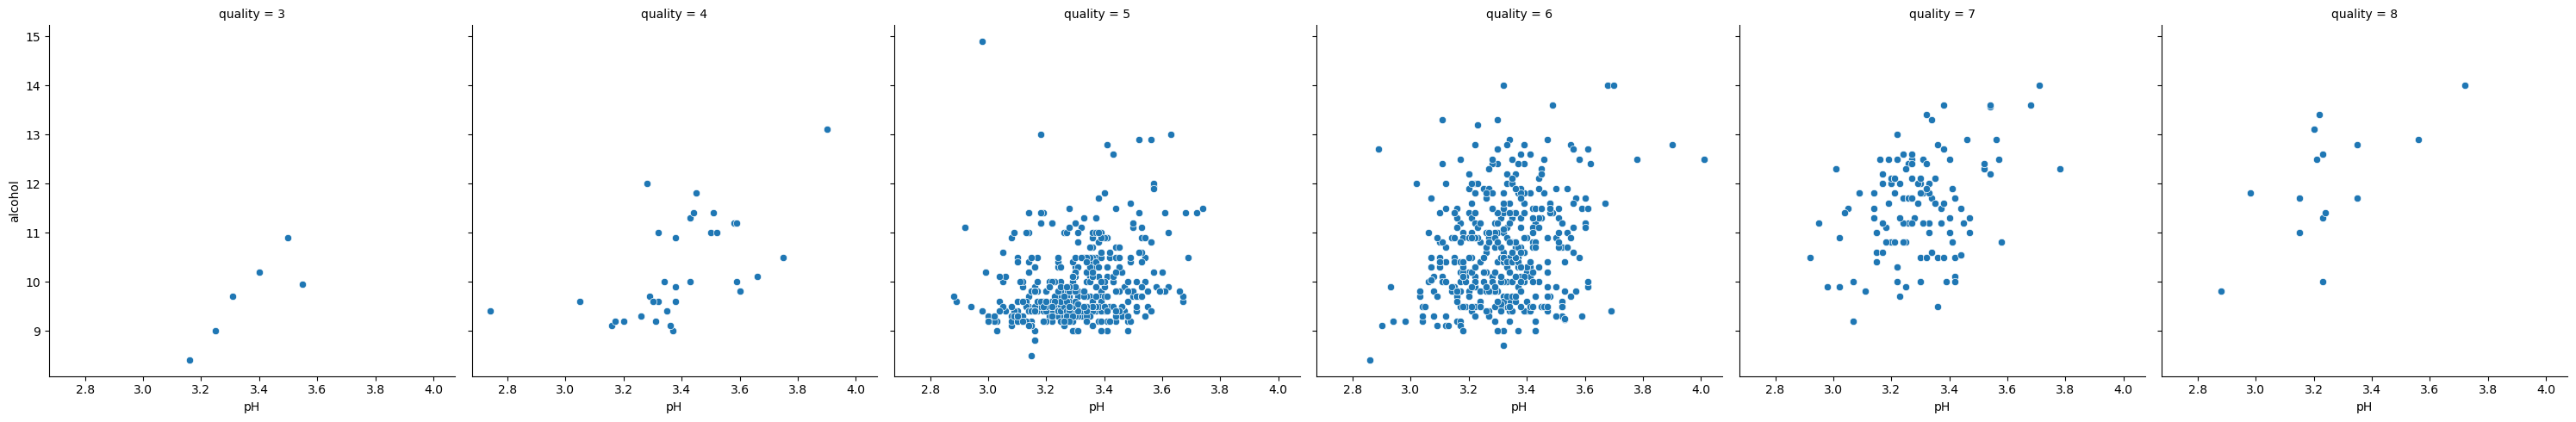

In [59]:
sns.relplot(x="pH", y="alcohol", col="quality",data=wine_g)

<Axes: xlabel='quality', ylabel='alcohol'>

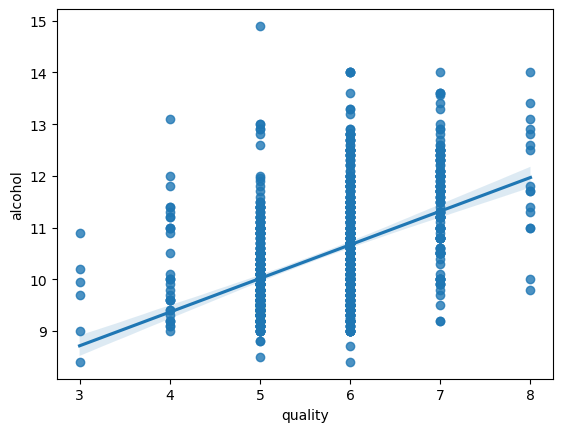

In [60]:
sns.regplot(x="quality", y="alcohol", data=wine_g)

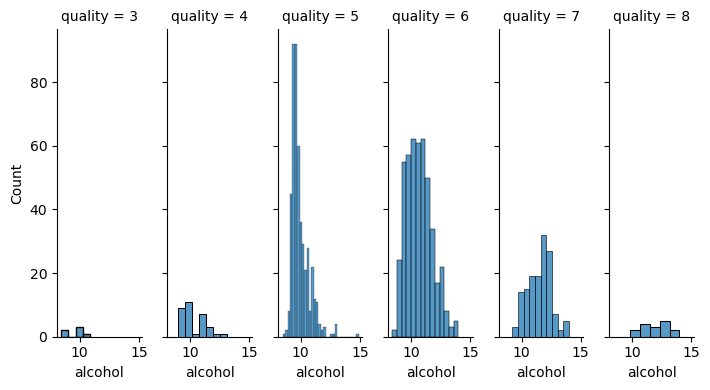

In [61]:
fg=sns.FacetGrid(wine_g, col="quality", height=4, aspect=0.3)
fg.map(sns.histplot, "alcohol")

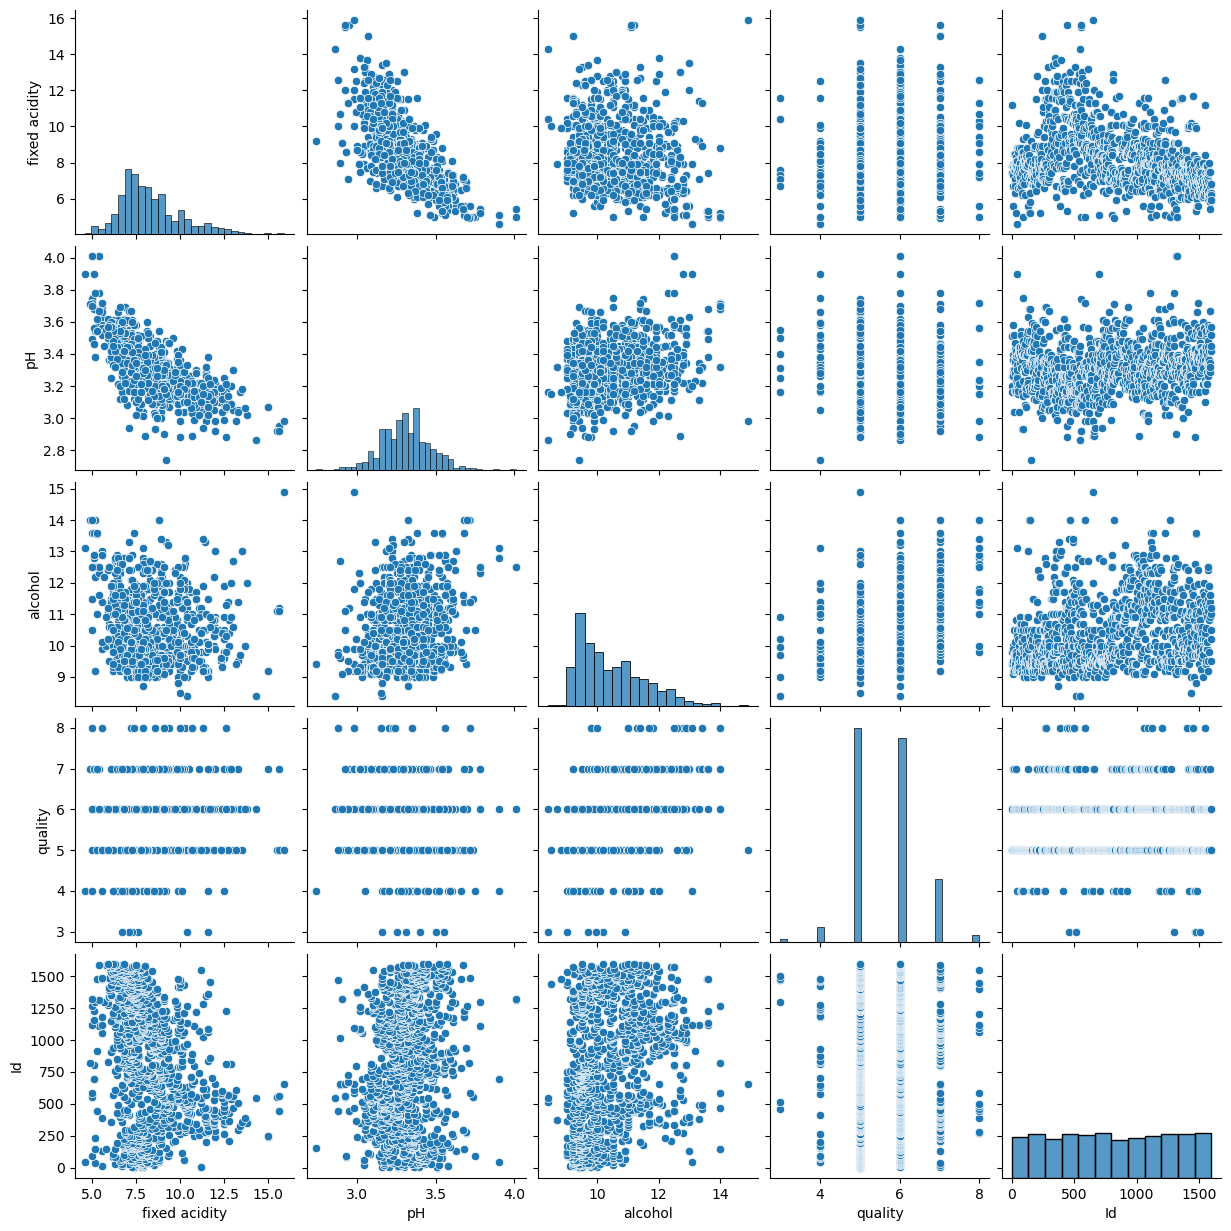

In [62]:
sns.pairplot(wine_g)

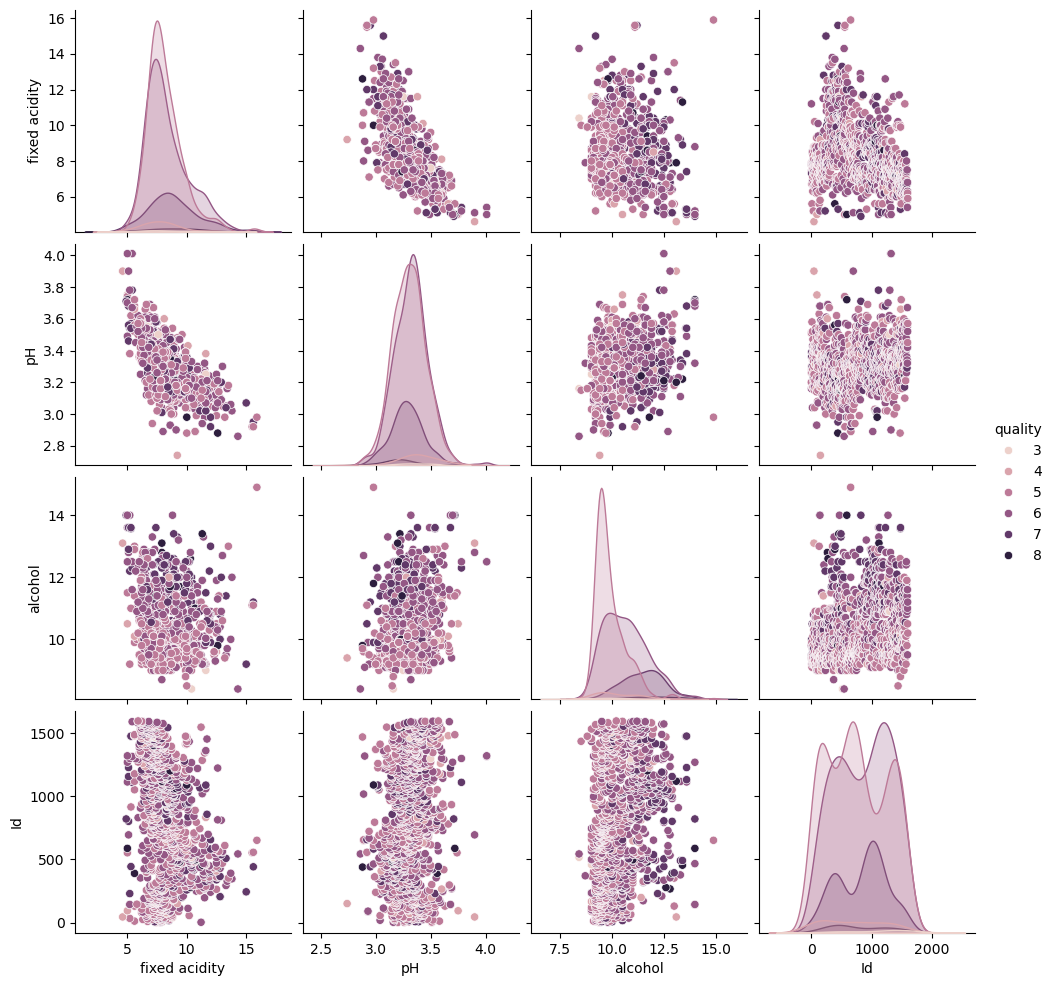

In [63]:
sns.pairplot(wine_g,hue="quality")